# Create data for machine learning

## Read data files

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [2]:
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


### Vitals

In [3]:
vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
selectedVitals = ["Peripheral oxygen saturation", "Respiratory rate", "Temperature", "Systolic blood pressure", "Diastolic blood pressure", "Mean blood pressure", "Heart rate"]
vitalsDf = vitalsDf[vitalsDf.concept_name.isin(selectedVitals)].drop_duplicates()
vitalsDf["measurement_datetime"] = pd.to_datetime(vitalsDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
378295,84004766,16293635,2599003,2022-04-08,Temperature,35.9
378296,24703131,12591406,2202499,2019-07-14,Temperature,36.5
378297,39259423,15198519,2015831,2021-09-03,Temperature,36.8
378298,84662503,16293635,2599003,2022-04-20,Temperature,36.8
378299,84382995,16293635,2599003,2022-04-15,Temperature,37.8
...,...,...,...,...,...,...
15641534,82881537,16248898,2046775,2022-03-20,Respiratory rate,17.0
15641535,83183441,16282402,2119654,2022-03-25,Respiratory rate,18.0
15641537,82883702,16248898,2046775,2022-03-20,Respiratory rate,15.0
15641539,82886013,16248898,2046775,2022-03-20,Respiratory rate,20.0


In [5]:
vitalsDf.concept_name.value_counts()

concept_name
Peripheral oxygen saturation    1095446
Respiratory rate                1065446
Heart rate                       895846
Mean blood pressure              787601
Systolic blood pressure          761994
Diastolic blood pressure         761361
Temperature                      739108
Name: count, dtype: int64

In [6]:
import pandas as pd


vitalsPivotedDf = pd.pivot_table(vitalsDf, values=['value_as_number'], index=['measurement_id', 'visit_occurrence_id', 'person_id', 'measurement_datetime'], columns=['concept_name']).droplevel(level=0, axis=1).reset_index()
vitalsPivotedDf = vitalsPivotedDf.sort_values(by=['person_id', 'visit_occurrence_id', 'measurement_datetime', 'measurement_id'], ascending=True)
vitalsPivotedDf

concept_name,measurement_id,visit_occurrence_id,person_id,measurement_datetime,Diastolic blood pressure,Heart rate,Mean blood pressure,Peripheral oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature
987937,17276146,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,22.0,NaN,NaN
987938,17276147,12790706,18849,2019-09-01,74.0,NaN,NaN,NaN,NaN,NaN,NaN
987939,17276184,12790706,18849,2019-09-01,NaN,NaN,NaN,96.0,NaN,NaN,NaN
987940,17276185,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,132.0,NaN
987941,17276197,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,35.5
...,...,...,...,...,...,...,...,...,...,...,...
179104,5136519,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,20.0,NaN,NaN
202453,5814399,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,103.0,NaN
202454,5814400,17565632,2684042,2023-04-01,52.0,NaN,NaN,NaN,NaN,NaN,NaN
202455,5814401,17565632,2684042,2023-04-01,NaN,84.0,NaN,NaN,NaN,NaN,NaN


In [7]:
VitalsFormattedDf = vitalsPivotedDf.groupby(
    by=['person_id', 'visit_occurrence_id', 'measurement_datetime']
    ).agg(
        {
            'Diastolic blood pressure': [
            ('Diastolic blood pressure_mean', 'mean'),
            ('Diastolic blood pressure_min', 'min'),
            ('Diastolic blood pressure_max', 'max'),
            ('Diastolic blood pressure_first', 'first'),
            ('Diastolic blood pressure_last', 'last'),
            ('Diastolic blood pressure_std', 'std'),
            ],
            'Heart rate': [
            ('Heart rate_mean', 'mean'),
            ('Heart rate_min', 'min'),
            ('Heart rate_max', 'max'),
            ('Heart rate_first', 'first'),
            ('Heart rate_last', 'last'),
            ('Heart rate_std', 'std'),
            ],
            'Mean blood pressure': [
            ('Mean blood pressure_mean', 'mean'),
            ('Mean blood pressure_min', 'min'),
            ('Mean blood pressure_max', 'max'),
            ('Mean blood pressure_first', 'first'),
            ('Mean blood pressure_last', 'last'),
            ('Mean blood pressure_std', 'std'),
            ],
            'Peripheral oxygen saturation': [
            ('Peripheral oxygen saturation_mean', 'mean'),
            ('Peripheral oxygen saturation_min', 'min'),
            ('Peripheral oxygen saturation_max', 'max'),
            ('Peripheral oxygen saturation_first', 'first'),
            ('Peripheral oxygen saturation_last', 'last'),
            ('Peripheral oxygen saturation_std', 'std'),
            ],
            'Respiratory rate': [
            ('Respiratory rate_mean', 'mean'),
            ('Respiratory rate_min', 'min'),
            ('Respiratory rate_max', 'max'),
            ('Respiratory rate_first', 'first'),
            ('Respiratory rate_last', 'last'),
            ('Respiratory rate_std', 'std'),
            ],
            'Systolic blood pressure': [
            ('Systolic blood pressure_mean', 'mean'),
            ('Systolic blood pressure_min', 'min'),
            ('Systolic blood pressure_max', 'max'),
            ('Systolic blood pressure_first', 'first'),
            ('Systolic blood pressure_last', 'last'),
            ('Systolic blood pressure_std', 'std'),
            ],
            'Temperature': [
            ('Temperature_mean', 'mean'),
            ('Temperature_min', 'min'),
            ('Temperature_max', 'max'),
            ('Temperature_first', 'first'),
            ('Temperature_last', 'last'),
            ('Temperature_std', 'std'),
            ],
        }
    ).droplevel(level=0, axis=1).reset_index()
VitalsFormattedDf

,person_id,visit_occurrence_id,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_max,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500000,...,155.0,132.0,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000000,...,121.0,120.0,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000000,...,129.0,127.0,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222
3,41308,14824675,2021-05-31,59.000000,55.0,63.0,55.0,63.0,5.656854,104.000000,...,124.0,121.0,124.0,2.121320,29.900000,29.9,29.9,29.9,29.9,NaN
4,41308,14824675,2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146586,2682433,17536805,2023-03-25,76.095238,62.0,93.0,74.0,69.0,8.111133,67.324324,...,128.0,109.0,101.0,7.405918,35.788889,35.2,36.2,36.2,35.9,0.321887
146587,2682433,17536805,2023-03-26,89.500000,82.0,99.0,82.0,90.0,7.141428,61.000000,...,128.0,104.0,128.0,11.324752,35.800000,35.5,36.0,35.9,36.0,0.264575
146588,2684042,17565390,2023-03-31,65.000000,58.0,72.0,58.0,72.0,9.899495,97.000000,...,125.0,116.0,125.0,6.363961,NaN,NaN,NaN,NaN,NaN,NaN
146589,2684042,17565390,2023-04-01,51.400000,48.0,53.0,52.0,53.0,1.949359,NaN,...,112.0,112.0,104.0,4.086563,36.100000,36.0,36.2,36.0,36.1,0.100000


### Labs

In [8]:
labsDf = pd.read_csv(Path(extractDirName, 'labs_raw.csv'))
labsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,measurement_concept_id,concept_name,value_as_number
0,173682760,13568338,661074,2020-06-10 21:25:42,1013241000000102,Serum ionized calcium (pH 7.4) level,1.33
1,173223986,13568338,661074,2020-05-27 14:12:40,1013241000000102,Serum ionized calcium (pH 7.4) level,1.06
2,173202693,13532823,2164770,2020-05-27 03:02:13,1013241000000102,Serum ionized calcium (pH 7.4) level,1.10
3,173202692,13532823,2164770,2020-05-27 03:02:13,1013241000000102,Serum ionized calcium (pH 7.4) level,1.09
4,173223986,13568338,661074,2020-05-27 14:12:40,1013241000000102,Serum ionized calcium (pH 7.4) level,1.06
...,...,...,...,...,...,...,...
16423134,172270546,13460833,1011324,2020-04-25 12:31:22,997611000000101,Total alkaline phosphatase level,1230.00
16423135,172382499,13502624,2211081,2020-04-29 15:21:44,997611000000101,Total alkaline phosphatase level,101.00
16423136,172402302,13479917,2150346,2020-04-30 11:14:07,997611000000101,Total alkaline phosphatase level,276.00
16423137,172423837,13457816,2358738,2020-05-01 06:57:02,997611000000101,Total alkaline phosphatase level,132.00


In [9]:
selectedLabs = ['White blood cell count', 'Basophil count', 'Bicarbonate', 'Blood urea', 'Chloride salt', 'Creatinine', 'Eosinophil count', 'Haemoglobin estimation', 'Hematocrit', 'Lymphocyte', 'MCHC - Mean corpuscular haemoglobin concentration', 'MCH - Mean corpuscular haemoglobin', 'MCV - Mean corpuscular volume', 'Monocyte', 'Neutrophil count', 'Potassium', 'Red blood cell count', 'Red blood cell distribution width', 'Sodium', 'Platelet', 'Alanine aminotransferase', 'GGT (gamma-glutamyl transferase) level', 'Albumin', 'Bilirubin', 'Total alkaline phosphatase level', 'Total protein measurement', 'Globulin', 'Calcium', 'Phosphate measurement', 'Magnesium measurement']
labsDf = labsDf[labsDf.concept_name.isin(selectedLabs)].drop_duplicates()
labsDf["measurement_datetime"] = pd.to_datetime(labsDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
labsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,measurement_concept_id,concept_name,value_as_number
410810,208940166,17041562,2652541,2022-12-21,1022431000000105,Haemoglobin estimation,75.0
410811,208567052,17148908,2659220,2022-12-11,1022431000000105,Haemoglobin estimation,88.0
410814,208567369,17041562,2652541,2022-12-11,1022431000000105,Haemoglobin estimation,73.0
410818,208572198,17041562,2652541,2022-12-11,1022431000000105,Haemoglobin estimation,65.0
410822,208955029,16883157,2642988,2022-12-21,1022431000000105,Haemoglobin estimation,91.0
...,...,...,...,...,...,...,...
16423129,172627595,13494471,2129168,2020-05-08,997611000000101,Total alkaline phosphatase level,129.0
16423131,172362713,13485477,2361638,2020-04-29,997611000000101,Total alkaline phosphatase level,115.0
16423135,172382499,13502624,2211081,2020-04-29,997611000000101,Total alkaline phosphatase level,101.0
16423137,172423837,13457816,2358738,2020-05-01,997611000000101,Total alkaline phosphatase level,132.0


In [10]:
labsDf.concept_name.value_counts()

concept_name
Chloride salt                                        359352
Sodium                                               359097
Haemoglobin estimation                               357829
Potassium                                            357758
Creatinine                                           187490
Blood urea                                           187336
Bicarbonate                                          186876
Lymphocyte                                           186155
Red blood cell count                                 185912
Hematocrit                                           185899
MCH - Mean corpuscular haemoglobin                   185884
MCHC - Mean corpuscular haemoglobin concentration    185868
MCV - Mean corpuscular volume                        185864
Red blood cell distribution width                    185828
Eosinophil count                                     185743
Monocyte                                             185673
Platelet                   

In [11]:
import pandas as pd


labsPivotedDf = pd.pivot_table(labsDf, values=['value_as_number'], index=['measurement_id', 'visit_occurrence_id', 'person_id', 'measurement_datetime'], columns=['concept_name']).droplevel(level=0, axis=1).reset_index()
labsPivotedDf = labsPivotedDf.sort_values(by=['person_id', 'visit_occurrence_id', 'measurement_datetime', 'measurement_id'], ascending=True)
labsPivotedDf

concept_name,measurement_id,visit_occurrence_id,person_id,measurement_datetime,Alanine aminotransferase,Albumin,Basophil count,Bicarbonate,Bilirubin,Blood urea,...,Neutrophil count,Phosphate measurement,Platelet,Potassium,Red blood cell count,Red blood cell distribution width,Sodium,Total alkaline phosphatase level,Total protein measurement,White blood cell count
2925042,163806371,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2931513,163892145,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.51,NaN,NaN,NaN,NaN,NaN
2931784,163894960,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,15.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2931800,163895142,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2932455,163903575,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788659,212956287,17565390,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,NaN,NaN
5788660,212956288,17565390,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5788661,212956289,17565390,2684042,2023-04-01,NaN,NaN,NaN,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5788662,212956290,17565390,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
labsFormattedDf = labsPivotedDf.groupby(
    by=['person_id', 'visit_occurrence_id', 'measurement_datetime']
    ).agg(
        {
            'White blood cell count': [
                ('White blood cell count_mean', 'mean'),
                ('White blood cell count_min', 'min'),
                ('White blood cell count_max', 'max'),
                ('White blood cell count_first', 'first'),
                ('White blood cell count_last', 'last'),
                ('White blood cell count_std', 'std'),
            ],
            'Basophil count': [
                ('Basophil count_mean', 'mean'),
                ('Basophil count_min', 'min'),
                ('Basophil count_max', 'max'),
                ('Basophil count_first', 'first'),
                ('Basophil count_last', 'last'),
                ('Basophil count_std', 'std'),
            ],
            'Bicarbonate': [
                ('Bicarbonate_mean', 'mean'),
                ('Bicarbonate_min', 'min'),
                ('Bicarbonate_max', 'max'),
                ('Bicarbonate_first', 'first'),
                ('Bicarbonate_last', 'last'),
                ('Bicarbonate_std', 'std'),
            ],
            'Blood urea': [
                ('Blood urea_mean', 'mean'),
                ('Blood urea_min', 'min'),
                ('Blood urea_max', 'max'),
                ('Blood urea_first', 'first'),
                ('Blood urea_last', 'last'),
                ('Blood urea_std', 'std'),
            ],
            'Chloride salt': [
                ('Chloride salt_mean', 'mean'),
                ('Chloride salt_min', 'min'),
                ('Chloride salt_max', 'max'),
                ('Chloride salt_first', 'first'),
                ('Chloride salt_last', 'last'),
                ('Chloride salt_std', 'std'),
            ],
            'Creatinine': [
                ('Creatinine_mean', 'mean'),
                ('Creatinine_min', 'min'),
                ('Creatinine_max', 'max'),
                ('Creatinine_first', 'first'),
                ('Creatinine_last', 'last'),
                ('Creatinine_std', 'std'),
            ],
            'Eosinophil count': [
                ('Eosinophil count_mean', 'mean'),
                ('Eosinophil count_min', 'min'),
                ('Eosinophil count_max', 'max'),
                ('Eosinophil count_first', 'first'),
                ('Eosinophil count_last', 'last'),
                ('Eosinophil count_std', 'std'),
            ],
            'Haemoglobin estimation': [
                ('Haemoglobin estimation_mean', 'mean'),
                ('Haemoglobin estimation_min', 'min'),
                ('Haemoglobin estimation_max', 'max'),
                ('Haemoglobin estimation_first', 'first'),
                ('Haemoglobin estimation_last', 'last'),
                ('Haemoglobin estimation_std', 'std'),
            ],
            'Hematocrit': [
                ('Hematocrit_mean', 'mean'),
                ('Hematocrit_min', 'min'),
                ('Hematocrit_max', 'max'),
                ('Hematocrit_first', 'first'),
                ('Hematocrit_last', 'last'),
                ('Hematocrit_std', 'std'),
            ],
            'Lymphocyte': [
                ('Lymphocyte_mean', 'mean'),
                ('Lymphocyte_min', 'min'),
                ('Lymphocyte_max', 'max'),
                ('Lymphocyte_first', 'first'),
                ('Lymphocyte_last', 'last'),
                ('Lymphocyte_std', 'std'),
            ],
            'MCHC - Mean corpuscular haemoglobin concentration': [
                ('MCHC - Mean corpuscular haemoglobin concentration_mean', 'mean'),
                ('MCHC - Mean corpuscular haemoglobin concentration_min', 'min'),
                ('MCHC - Mean corpuscular haemoglobin concentration_max', 'max'),
                ('MCHC - Mean corpuscular haemoglobin concentration_first', 'first'),
                ('MCHC - Mean corpuscular haemoglobin concentration_last', 'last'),
                ('MCHC - Mean corpuscular haemoglobin concentration_std', 'std'),
            ],
            'MCH - Mean corpuscular haemoglobin': [
                ('MCH - Mean corpuscular haemoglobin_mean', 'mean'),
                ('MCH - Mean corpuscular haemoglobin_min', 'min'),
                ('MCH - Mean corpuscular haemoglobin_max', 'max'),
                ('MCH - Mean corpuscular haemoglobin_first', 'first'),
                ('MCH - Mean corpuscular haemoglobin_last', 'last'),
                ('MCH - Mean corpuscular haemoglobin_std', 'std'),
            ],
            'MCV - Mean corpuscular volume': [
                ('MCV - Mean corpuscular volume_mean', 'mean'),
                ('MCV - Mean corpuscular volume_min', 'min'),
                ('MCV - Mean corpuscular volume_max', 'max'),
                ('MCV - Mean corpuscular volume_first', 'first'),
                ('MCV - Mean corpuscular volume_last', 'last'),
                ('MCV - Mean corpuscular volume_std', 'std'),
            ],
            'Monocyte': [
                ('Monocyte_mean', 'mean'),
                ('Monocyte_min', 'min'),
                ('Monocyte_max', 'max'),
                ('Monocyte_first', 'first'),
                ('Monocyte_last', 'last'),
                ('Monocyte_std', 'std'),
            ],
            'Neutrophil count': [
                ('Neutrophil count_mean', 'mean'),
                ('Neutrophil count_min', 'min'),
                ('Neutrophil count_max', 'max'),
                ('Neutrophil count_first', 'first'),
                ('Neutrophil count_last', 'last'),
                ('Neutrophil count_std', 'std'),
            ],
            'Potassium': [
                ('Potassium_mean', 'mean'),
                ('Potassium_min', 'min'),
                ('Potassium_max', 'max'),
                ('Potassium_first', 'first'),
                ('Potassium_last', 'last'),
                ('Potassium_std', 'std'),
            ],
            'Red blood cell count': [
                ('Red blood cell count_mean', 'mean'),
                ('Red blood cell count_min', 'min'),
                ('Red blood cell count_max', 'max'),
                ('Red blood cell count_first', 'first'),
                ('Red blood cell count_last', 'last'),
                ('Red blood cell count_std', 'std'),
            ],
            'Red blood cell distribution width': [
                ('Red blood cell distribution width_mean', 'mean'),
                ('Red blood cell distribution width_min', 'min'),
                ('Red blood cell distribution width_max', 'max'),
                ('Red blood cell distribution width_first', 'first'),
                ('Red blood cell distribution width_last', 'last'),
                ('Red blood cell distribution width_std', 'std'),
            ],
            'Sodium': [
                ('Sodium_mean', 'mean'),
                ('Sodium_min', 'min'),
                ('Sodium_max', 'max'),
                ('Sodium_first', 'first'),
                ('Sodium_last', 'last'),
                ('Sodium_std', 'std'),
            ],
            'Platelet': [
                ('Platelet_mean', 'mean'),
                ('Platelet_min', 'min'),
                ('Platelet_max', 'max'),
                ('Platelet_first', 'first'),
                ('Platelet_last', 'last'),
                ('Platelet_std', 'std'),
            ],
            'Alanine aminotransferase': [
                ('Alanine aminotransferase_mean', 'mean'),
                ('Alanine aminotransferase_min', 'min'),
                ('Alanine aminotransferase_max', 'max'),
                ('Alanine aminotransferase_first', 'first'),
                ('Alanine aminotransferase_last', 'last'),
                ('Alanine aminotransferase_std', 'std'),
            ],
            'GGT (gamma-glutamyl transferase) level': [
                ('GGT (gamma-glutamyl transferase) level_mean', 'mean'),
                ('GGT (gamma-glutamyl transferase) level_min', 'min'),
                ('GGT (gamma-glutamyl transferase) level_max', 'max'),
                ('GGT (gamma-glutamyl transferase) level_first', 'first'),
                ('GGT (gamma-glutamyl transferase) level_last', 'last'),
                ('GGT (gamma-glutamyl transferase) level_std', 'std'),
            ],
            'Albumin': [
                ('Albumin_mean', 'mean'),
                ('Albumin_min', 'min'),
                ('Albumin_max', 'max'),
                ('Albumin_first', 'first'),
                ('Albumin_last', 'last'),
                ('Albumin_std', 'std'),
            ],
            'Bilirubin': [
                ('Bilirubin_mean', 'mean'),
                ('Bilirubin_min', 'min'),
                ('Bilirubin_max', 'max'),
                ('Bilirubin_first', 'first'),
                ('Bilirubin_last', 'last'),
                ('Bilirubin_std', 'std'),
            ],
            'Total alkaline phosphatase level': [
                ('Total alkaline phosphatase level_mean', 'mean'),
                ('Total alkaline phosphatase level_min', 'min'),
                ('Total alkaline phosphatase level_max', 'max'),
                ('Total alkaline phosphatase level_first', 'first'),
                ('Total alkaline phosphatase level_last', 'last'),
                ('Total alkaline phosphatase level_std', 'std'),
            ],
            'Total protein measurement': [
                ('Total protein measurement_mean', 'mean'),
                ('Total protein measurement_min', 'min'),
                ('Total protein measurement_max', 'max'),
                ('Total protein measurement_first', 'first'),
                ('Total protein measurement_last', 'last'),
                ('Total protein measurement_std', 'std'),
            ],
            'Globulin': [
                ('Globulin_mean', 'mean'),
                ('Globulin_min', 'min'),
                ('Globulin_max', 'max'),
                ('Globulin_first', 'first'),
                ('Globulin_last', 'last'),
                ('Globulin_std', 'std'),
            ],
            'Calcium': [
                ('Calcium_mean', 'mean'),
                ('Calcium_min', 'min'),
                ('Calcium_max', 'max'),
                ('Calcium_first', 'first'),
                ('Calcium_last', 'last'),
                ('Calcium_std', 'std'),
            ],
            'Phosphate measurement': [
                ('Phosphate measurement_mean', 'mean'),
                ('Phosphate measurement_min', 'min'),
                ('Phosphate measurement_max', 'max'),
                ('Phosphate measurement_first', 'first'),
                ('Phosphate measurement_last', 'last'),
                ('Phosphate measurement_std', 'std'),
            ],
            'Magnesium measurement': [
                ('Magnesium measurement_mean', 'mean'),
                ('Magnesium measurement_min', 'min'),
                ('Magnesium measurement_max', 'max'),
                ('Magnesium measurement_first', 'first'),
                ('Magnesium measurement_last', 'last'),
                ('Magnesium measurement_std', 'std'),
            ],
        }
    ).droplevel(level=0, axis=1).reset_index()
labsFormattedDf

,person_id,visit_occurrence_id,measurement_datetime,White blood cell count_mean,White blood cell count_min,White blood cell count_max,White blood cell count_first,White blood cell count_last,White blood cell count_std,Basophil count_mean,...,Phosphate measurement_max,Phosphate measurement_first,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std
0,18849,12790706,2019-09-01,17.40,17.40,17.40,17.40,17.40,NaN,0.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18849,12790706,2019-09-02,17.21,17.21,17.21,17.21,17.21,NaN,0.060,...,0.71,0.71,0.71,NaN,0.59,0.59,0.59,0.59,0.59,NaN
2,18849,12790706,2019-09-03,11.19,11.19,11.19,11.19,11.19,NaN,0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41308,14824675,2021-05-31,15.98,15.98,15.98,15.98,15.98,NaN,0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49412,14519127,2021-03-17,7.25,7.25,7.25,7.25,7.25,NaN,0.050,...,1.17,1.17,1.17,NaN,0.94,0.94,0.94,0.94,0.94,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176730,2681377,17518169,2023-04-26,4.92,4.92,4.92,4.92,4.92,NaN,0.000,...,0.90,0.90,0.90,NaN,0.72,0.72,0.72,0.72,0.72,NaN
176731,2682433,17536805,2023-03-24,7.84,7.84,7.84,7.84,7.84,NaN,0.040,...,0.72,0.72,0.72,NaN,0.69,0.69,0.69,0.69,0.69,NaN
176732,2682433,17536805,2023-03-25,6.89,6.89,6.89,6.89,6.89,NaN,0.060,...,0.53,0.53,0.53,NaN,0.77,0.77,0.77,0.77,0.77,NaN
176733,2682433,17536805,2023-03-26,8.77,8.77,8.77,8.77,8.77,NaN,0.010,...,0.58,0.58,0.58,NaN,0.82,0.82,0.82,0.82,0.82,NaN


### Target labels

In [13]:
icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))
icdsDf

/tmp/ipykernel_528080/505271447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))


,EPISODE_ID,PATIENT_ID,AUSTRALIAN_MODIFICATION,PREFIX,ICD_DESCRIPTION,RANK,ICD10CODE
0,17135310,2161346,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
1,17107985,2147565,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
2,17106652,2182523,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
3,17103071,2200486,Z491,P,Extracorporeal dialysis,1,NaN
4,17103049,2200486,Z491,P,Extracorporeal dialysis,1,NaN
...,...,...,...,...,...,...,...
456643,9,2089883,M8199,P,"Unspecified osteoporosis, site unspecified",8,NaN
456644,9,2089883,I10,P,Essential (primary) hypertension,7,NaN
456645,9,2089883,E86,P,Volume depletion,6,NaN
456646,9,2089883,U739,P,Unspecified activity,5,NaN


In [14]:
sepsisDf = icdsDf[(icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A40')) | (icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A41'))][['EPISODE_ID', 'PATIENT_ID']].drop_duplicates()
sepsisDf['sepsis'] = 1
sepsisDf

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


## Create balanced data

In [15]:
notsepsisDf = admissionsDf[~admissionsDf[['PATIENT_ID', 'EPISODE_ID']].set_index(['PATIENT_ID', 'EPISODE_ID']).index.isin(sepsisDf.set_index(['PATIENT_ID', 'EPISODE_ID']).index)][['PATIENT_ID', 'EPISODE_ID']]
notsepsisDf = notsepsisDf.sample(n=sepsisDf.drop_duplicates().shape[0])
notsepsisDf

,PATIENT_ID,EPISODE_ID
87323,2154729,10220685
59811,2018127,8118080
185302,1039612,15937054
137339,862184,13707615
73127,2113645,9499208
...,...,...
140062,2093629,13832517
211394,2595702,17150849
198052,804296,16496971
102417,2218906,11114942


In [16]:
balancedDf = pd.concat([sepsisDf[['PATIENT_ID', 'EPISODE_ID']], notsepsisDf], ignore_index=True)
balancedDf

,PATIENT_ID,EPISODE_ID
0,2188789,17030802
1,1466886,17003144
2,2097130,16982177
3,2090730,16875811
4,2193278,16859246
...,...,...
7961,2093629,13832517
7962,2595702,17150849
7963,804296,16496971
7964,2218906,11114942


## Merge all the files

In [17]:
VitalsFormattedDf.shape, labsFormattedDf.shape, VitalsFormattedDf.merge(labsFormattedDf, how='inner', on=['person_id', 'visit_occurrence_id', 'measurement_datetime']).shape

((146591, 45), (176735, 183), (101943, 225))

In [18]:
measurementsDf = VitalsFormattedDf.merge(
    labsFormattedDf,
    how='outer',
    on=['person_id', 'visit_occurrence_id', 'measurement_datetime']
)
measurementsDf

,person_id,visit_occurrence_id,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_max,Phosphate measurement_first,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000000,...,0.71,0.71,0.71,NaN,0.59,0.59,0.59,0.59,0.59,NaN
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41308,14824675,2021-05-31,59.000000,55.0,63.0,55.0,63.0,5.656854,104.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41308,14824675,2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221378,2682433,17536805,2023-03-25,76.095238,62.0,93.0,74.0,69.0,8.111133,67.324324,...,0.53,0.53,0.53,NaN,0.77,0.77,0.77,0.77,0.77,NaN
221379,2682433,17536805,2023-03-26,89.500000,82.0,99.0,82.0,90.0,7.141428,61.000000,...,0.58,0.58,0.58,NaN,0.82,0.82,0.82,0.82,0.82,NaN
221380,2684042,17565390,2023-03-31,65.000000,58.0,72.0,58.0,72.0,9.899495,97.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221381,2684042,17565390,2023-04-01,51.400000,48.0,53.0,52.0,53.0,1.949359,NaN,...,0.86,0.86,0.86,NaN,0.68,0.68,0.68,0.68,0.68,NaN


In [19]:
dataDf = admissionsDf[['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED']].drop_duplicates().merge(
    balancedDf,
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID'],
).merge(
    measurementsDf,
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(columns=['person_id', 'visit_occurrence_id']).merge(
    sepsisDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).fillna({'sepsis': 0})
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Phosphate measurement_first,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,sepsis
0,2141606,15258,2014-08-31 08:45:41.000,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0
1,2141606,15258,2014-08-31 08:17:49.000,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0
2,2096825,29346,2014-06-17 17:57:18.000,2013-12-07,NaN,NaN,NaN,NaN,NaN,NaN,...,2.44,2.44,NaN,0.960000,0.96,0.96,0.96,0.96,NaN,1.0
3,2096825,29346,2014-06-17 17:57:18.000,2013-12-08,NaN,NaN,NaN,NaN,NaN,NaN,...,2.47,1.73,0.373631,1.086667,1.01,1.23,1.01,1.23,0.124231,1.0
4,2096825,29346,2014-06-17 17:57:18.000,2013-12-09,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.70,NaN,1.170000,1.17,1.17,1.17,1.17,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82553,2449953,17907968,2023-07-11 08:07:29.000,2023-07-14,61.500000,52.0,71.0,52.0,61.0,7.476630,...,1.13,1.13,NaN,0.720000,0.72,0.72,0.72,0.72,NaN,0.0
82554,2449953,17907968,2023-07-11 08:07:29.000,2023-07-15,67.400000,64.0,73.0,73.0,66.0,3.435113,...,1.13,1.13,NaN,0.730000,0.73,0.73,0.73,0.73,NaN,0.0
82555,2449953,17907968,2023-07-11 08:07:29.000,2023-07-16,77.375000,65.0,114.0,114.0,76.0,15.230960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82556,2449953,17907968,2023-07-11 08:07:29.000,2023-07-17,73.333333,54.0,84.0,77.0,73.0,8.370221,...,1.22,1.22,NaN,0.770000,0.77,0.77,0.77,0.77,NaN,0.0


In [20]:
dataDf["Organism_FIRST_NOTED"] = pd.to_datetime(dataDf["Organism_FIRST_NOTED"]).dt.strftime('%Y-%m-%d')
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Phosphate measurement_first,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,sepsis
0,2141606,15258,2014-08-31,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0
1,2141606,15258,2014-08-31,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0
2,2096825,29346,2014-06-17,2013-12-07,NaN,NaN,NaN,NaN,NaN,NaN,...,2.44,2.44,NaN,0.960000,0.96,0.96,0.96,0.96,NaN,1.0
3,2096825,29346,2014-06-17,2013-12-08,NaN,NaN,NaN,NaN,NaN,NaN,...,2.47,1.73,0.373631,1.086667,1.01,1.23,1.01,1.23,0.124231,1.0
4,2096825,29346,2014-06-17,2013-12-09,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.70,NaN,1.170000,1.17,1.17,1.17,1.17,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82553,2449953,17907968,2023-07-11,2023-07-14,61.500000,52.0,71.0,52.0,61.0,7.476630,...,1.13,1.13,NaN,0.720000,0.72,0.72,0.72,0.72,NaN,0.0
82554,2449953,17907968,2023-07-11,2023-07-15,67.400000,64.0,73.0,73.0,66.0,3.435113,...,1.13,1.13,NaN,0.730000,0.73,0.73,0.73,0.73,NaN,0.0
82555,2449953,17907968,2023-07-11,2023-07-16,77.375000,65.0,114.0,114.0,76.0,15.230960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82556,2449953,17907968,2023-07-11,2023-07-17,73.333333,54.0,84.0,77.0,73.0,8.370221,...,1.22,1.22,NaN,0.770000,0.77,0.77,0.77,0.77,NaN,0.0


In [21]:
dataDf = dataDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': [('Organism_FIRST_NOTED_updated', 'first')]}).droplevel(level=0, axis=1).reset_index(),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).rename(
    columns={'Organism_FIRST_NOTED_updated': 'Organism_FIRST_NOTED'}
)
dataDf


,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,sepsis,Organism_FIRST_NOTED
0,2141606,15258,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0,2014-08-31
1,2141606,15258,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,NaN,0.800000,0.80,0.80,0.80,0.80,NaN,0.0,2014-08-31
2,2096825,29346,2013-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.44,NaN,0.960000,0.96,0.96,0.96,0.96,NaN,1.0,2014-06-17
3,2096825,29346,2013-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.73,0.373631,1.086667,1.01,1.23,1.01,1.23,0.124231,1.0,2014-06-17
4,2096825,29346,2013-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,NaN,1.170000,1.17,1.17,1.17,1.17,NaN,1.0,2014-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82553,2449953,17907968,2023-07-14,61.500000,52.0,71.0,52.0,61.0,7.476630,65.333333,...,1.13,NaN,0.720000,0.72,0.72,0.72,0.72,NaN,0.0,2023-07-11
82554,2449953,17907968,2023-07-15,67.400000,64.0,73.0,73.0,66.0,3.435113,66.400000,...,1.13,NaN,0.730000,0.73,0.73,0.73,0.73,NaN,0.0,2023-07-11
82555,2449953,17907968,2023-07-16,77.375000,65.0,114.0,114.0,76.0,15.230960,66.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2023-07-11
82556,2449953,17907968,2023-07-17,73.333333,54.0,84.0,77.0,73.0,8.370221,63.600000,...,1.22,NaN,0.770000,0.77,0.77,0.77,0.77,NaN,0.0,2023-07-11


In [22]:
countDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'sepsis']).agg({'PATIENT_ID': [('count_value', 'count')]}).droplevel(level=0, axis=1).reset_index()
countDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,sepsis,count_value
0,51211,17422049,2023-04-01,2023-02-20,0.0,1
1,56089,14164983,2020-12-07,2020-12-07,0.0,1
2,56089,14164983,2020-12-07,2020-12-08,0.0,1
3,56089,14164983,2020-12-07,2020-12-09,0.0,1
4,56089,14164983,2020-12-07,2020-12-10,0.0,1
...,...,...,...,...,...,...
42417,2662222,17201307,2022-12-21,2022-12-30,0.0,1
42418,2662222,17201307,2022-12-21,2022-12-31,0.0,1
42419,2662222,17201307,2022-12-21,2023-01-01,0.0,1
42420,2662222,17201307,2022-12-21,2023-01-02,0.0,1


In [23]:
countDf.count_value.apply(lambda x: x if (x < 10) else None).value_counts()/countDf.shape[0] * 100

count_value
1.0    54.240724
2.0    22.683985
3.0    10.760926
4.0     6.689925
5.0     2.298336
8.0     1.114988
6.0     1.107916
7.0     0.829758
9.0     0.165009
Name: count, dtype: float64

In [24]:
dataDf.measurement_datetime = pd.to_datetime(dataDf.measurement_datetime)
dataDf.Organism_FIRST_NOTED = pd.to_datetime(dataDf.Organism_FIRST_NOTED)
measurementRangesDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'measurement_datetime': [('measurement_datetime_min', 'min'), ('measurement_datetime_max', 'max')]}).droplevel(level=0, axis=1).reset_index()
measurementRangesDf['measurement_datetime_range'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min)
measurementRangesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range
0,51211,17422049,2023-02-20,2023-02-20,0 days
1,56089,14164983,2020-12-07,2021-01-20,44 days
2,62567,12648702,2019-07-25,2019-08-15,21 days
3,69841,12848937,2019-09-19,2019-09-26,7 days
4,110792,15611828,2021-11-03,2021-11-16,13 days
...,...,...,...,...,...
2791,2645864,17499082,2023-03-14,2023-03-14,0 days
2792,2645864,17519017,2023-04-04,2023-04-04,0 days
2793,2645864,17662972,2023-05-12,2023-05-12,0 days
2794,2652541,17475676,2023-03-06,2023-03-11,5 days


<Axes: >

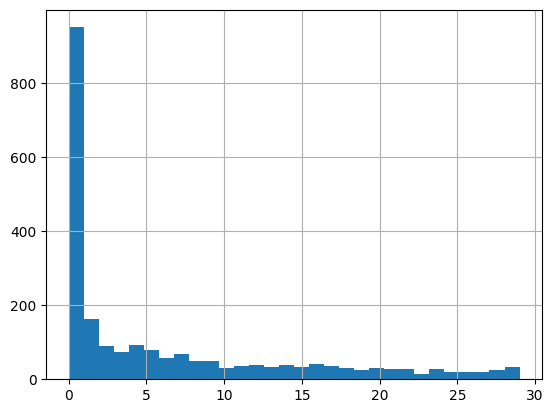

In [25]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 30 else None).hist(bins=30)

<Axes: >

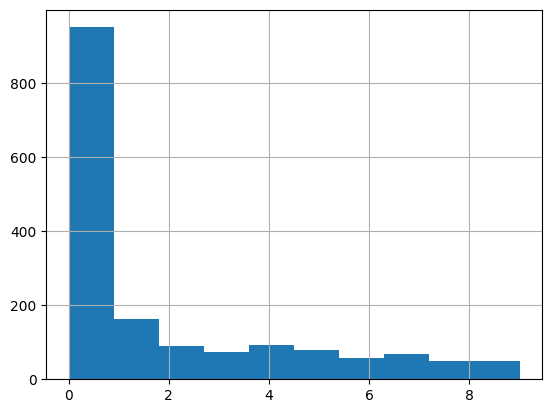

In [26]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=10)

In [27]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range
0.0    950
1.0    162
2.0     90
3.0     73
4.0     93
5.0     78
6.0     57
7.0     68
8.0     50
9.0     48
Name: count, dtype: int64

In [28]:
from datetime import timedelta


look_back = 3
measurementRangesDf['delta_days'] = measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: ((look_back - 1) - x)).apply(lambda x: x if x > 0 else 0)
measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)
measurementRangesDf['measurement_datetime_range_updated'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min_updated)
measurementRangesDf

/tmp/ipykernel_528080/38762998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)


,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range,delta_days,measurement_datetime_min_updated,measurement_datetime_range_updated
0,51211,17422049,2023-02-20,2023-02-20,0 days,2,2023-02-18,2 days
1,56089,14164983,2020-12-07,2021-01-20,44 days,0,2020-12-07,44 days
2,62567,12648702,2019-07-25,2019-08-15,21 days,0,2019-07-25,21 days
3,69841,12848937,2019-09-19,2019-09-26,7 days,0,2019-09-19,7 days
4,110792,15611828,2021-11-03,2021-11-16,13 days,0,2021-11-03,13 days
...,...,...,...,...,...,...,...,...
2791,2645864,17499082,2023-03-14,2023-03-14,0 days,2,2023-03-12,2 days
2792,2645864,17519017,2023-04-04,2023-04-04,0 days,2,2023-04-02,2 days
2793,2645864,17662972,2023-05-12,2023-05-12,0 days,2,2023-05-10,2 days
2794,2652541,17475676,2023-03-06,2023-03-11,5 days,0,2023-03-06,5 days


<Axes: >

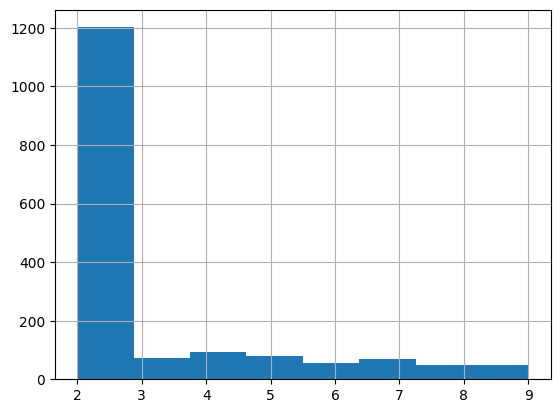

In [29]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=8)

In [30]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range_updated
2.0    1202
3.0      73
4.0      93
5.0      78
6.0      57
7.0      68
8.0      50
9.0      48
Name: count, dtype: int64

In [31]:
from datetime import timedelta


data = []
for i, row in measurementRangesDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime_min_updated', 'measurement_datetime_max']].drop_duplicates().iterrows():
    currentDate = row.measurement_datetime_min_updated
    while (currentDate <= row.measurement_datetime_max):
        data.append([row.PATIENT_ID, row.EPISODE_ID, currentDate])
        currentDate = currentDate + timedelta(days=1)

measurementDatesDf = pd.DataFrame(data, columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'])
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,51211,17422049,2023-02-18
1,51211,17422049,2023-02-19
2,51211,17422049,2023-02-20
3,56089,14164983,2020-12-07
4,56089,14164983,2020-12-08
...,...,...,...
61692,2662222,17201307,2022-12-30
61693,2662222,17201307,2022-12-31
61694,2662222,17201307,2023-01-01
61695,2662222,17201307,2023-01-02


In [32]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()

/tmp/ipykernel_528080/2660346801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()


np.int64(61697)

In [33]:
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,51211,17422049,2023-02-18
1,51211,17422049,2023-02-19
2,51211,17422049,2023-02-20
3,56089,14164983,2020-12-07
4,56089,14164983,2020-12-08
...,...,...,...
61692,2662222,17201307,2022-12-30
61693,2662222,17201307,2022-12-31
61694,2662222,17201307,2023-01-01
61695,2662222,17201307,2023-01-02


In [34]:
finalDf = measurementDatesDf.merge(
    dataDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,sepsis,Organism_FIRST_NOTED
0,51211,17422049,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,51211,17422049,2023-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,51211,17422049,2023-02-20,54.000000,54.0,54.0,54.0,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2023-04-01
3,56089,14164983,2020-12-07,55.285714,39.0,80.0,48.0,51.0,16.94810,79.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2020-12-07
4,56089,14164983,2020-12-08,58.285714,34.0,86.0,34.0,70.0,20.17188,70.833333,...,1.20,NaN,0.81,0.81,0.81,0.81,0.81,NaN,0.0,2020-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,2662222,17201307,2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,120.880000,...,0.88,NaN,0.91,0.91,0.91,0.91,0.91,NaN,0.0,2022-12-21
101829,2662222,17201307,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,129.120000,...,0.78,0.183848,1.05,1.01,1.09,1.09,1.01,0.056569,0.0,2022-12-21
101830,2662222,17201307,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,...,1.10,NaN,0.90,0.90,0.90,0.90,0.90,NaN,0.0,2022-12-21
101831,2662222,17201307,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,64.400000,...,1.09,NaN,3.50,3.50,3.50,3.50,3.50,NaN,0.0,2022-12-21


In [35]:
finalDf.isna().sum()

PATIENT_ID                           0
EPISODE_ID                           0
measurement_datetime                 0
Diastolic blood pressure_mean    70581
Diastolic blood pressure_min     70581
                                 ...  
Magnesium measurement_first      32552
Magnesium measurement_last       32552
Magnesium measurement_std        94449
sepsis                           19275
Organism_FIRST_NOTED             19275
Length: 227, dtype: int64

In [36]:
# finalDf = finalDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'concept_name', 'sepsis', 'value_mean', 'value_std', 'value_open', 'value_high', 'value_low', 'value_close']]
# finalDf['concept_name'] = 'Temperature'
finalDf = finalDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': 'first'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
).drop(columns=['sepsis']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'sepsis': 'max'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_last,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis
0,51211,17422049,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,0.0
1,51211,17422049,2023-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,0.0
2,51211,17422049,2023-02-20,54.000000,54.0,54.0,54.0,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,0.0
3,56089,14164983,2020-12-07,55.285714,39.0,80.0,48.0,51.0,16.94810,79.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-07,0.0
4,56089,14164983,2020-12-08,58.285714,34.0,86.0,34.0,70.0,20.17188,70.833333,...,1.20,NaN,0.81,0.81,0.81,0.81,0.81,NaN,2020-12-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,2662222,17201307,2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,120.880000,...,0.88,NaN,0.91,0.91,0.91,0.91,0.91,NaN,2022-12-21,0.0
101829,2662222,17201307,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,129.120000,...,0.78,0.183848,1.05,1.01,1.09,1.09,1.01,0.056569,2022-12-21,0.0
101830,2662222,17201307,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,...,1.10,NaN,0.90,0.90,0.90,0.90,0.90,NaN,2022-12-21,0.0
101831,2662222,17201307,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,64.400000,...,1.09,NaN,3.50,3.50,3.50,3.50,3.50,NaN,2022-12-21,0.0


In [37]:
from tqdm import tqdm


for col in tqdm(finalDf.columns[~finalDf.columns.isin(['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis'])]):
    filledDf = pd.DataFrame(columns=finalDf.columns)
    for (PATIENT_ID, EPISODE_ID), groupDf in finalDf.groupby(['PATIENT_ID', 'EPISODE_ID']):
        groupDf[col] = groupDf[col].fillna(groupDf[col].mean())
        filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
    finalDf = filledDf

  0%|          | 0/222 [00:00<?, ?it/s]/tmp/ipykernel_528080/3982654728.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
  0%|          | 1/222 [01:11<4:23:32, 71.55s/it]/tmp/ipykernel_528080/3982654728.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filledDf = pd.concat([filledDf, groupDf], ignore_index=True)
  1%|          | 2/222 [02:22<4:21:28, 71.31s/it]/tmp/ipykernel_528080/3982654728.py:8: FutureWarning: The behavior of D

In [38]:
finalDf.sepsis.value_counts()/finalDf.shape[0]

sepsis
1.0    0.801548
0.0    0.198452
Name: count, dtype: float64

In [39]:
finalDf = finalDf.merge(
    pd.DataFrame(
        list(finalDf[finalDf.sepsis == 1].apply(lambda x: (x.loc['PATIENT_ID'], x.loc['EPISODE_ID'], x.loc['measurement_datetime'], (1 if (x.loc['measurement_datetime'] >= x.loc['Organism_FIRST_NOTED']) else 0)), axis=1)),
        columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'target']
        ),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
).fillna(0)
finalDf

/tmp/ipykernel_528080/2153657339.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)


,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,51211,17422049,2023-02-18,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
1,51211,17422049,2023-02-19,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
2,51211,17422049,2023-02-20,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
3,56089,14164983,2020-12-07,55.285714,39.000000,80.0,48.000000,51.000000,16.948100,79.000000,...,0.070711,0.767143,0.766667,0.767619,0.766667,0.767619,0.014142,2020-12-07,0.0,0.0
4,56089,14164983,2020-12-08,58.285714,34.000000,86.0,34.000000,70.000000,20.171880,70.833333,...,0.070711,0.810000,0.810000,0.810000,0.810000,0.810000,0.014142,2020-12-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231552,2662222,17201307,2022-12-30,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,120.880000,...,0.234087,0.910000,0.910000,0.910000,0.910000,0.910000,0.108044,2022-12-21,0.0,0.0
231553,2662222,17201307,2022-12-31,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,129.120000,...,0.183848,1.050000,1.010000,1.090000,1.090000,1.010000,0.056569,2022-12-21,0.0,0.0
231554,2662222,17201307,2023-01-01,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,126.000000,...,0.234087,0.900000,0.900000,0.900000,0.900000,0.900000,0.108044,2022-12-21,0.0,0.0
231555,2662222,17201307,2023-01-02,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,64.400000,...,0.234087,3.500000,3.500000,3.500000,3.500000,3.500000,0.108044,2022-12-21,0.0,0.0


In [40]:
finalDf.target.value_counts()/finalDf.shape[0]

target
0.0    0.544734
1.0    0.455266
Name: count, dtype: float64

In [41]:
import os
from pathlib import Path


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

finalDf.to_csv(Path(dataDirName, 'data.csv'), index=False)